In [1]:
!git clone https://github.com/ViAsmit/YOLOv5-Flask.git

Cloning into 'YOLOv5-Flask'...


In [1]:
cd yolov5-flask

C:\Users\smhrd\yolov5-flask\yolov5-flask


In [3]:
!pip install -r requirements.txt

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Attempting uninstall: certifi
    Found existing installation: certifi 2021.10.8
    Uninstalling certifi-2021.10.8:
      Successfully uninstalled certifi-2021.10.8
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.4
    Uninstalling pyparsing-3.0.4:
      Successfully uninstalled pyparsing-3.0.4
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 3.0.3
    Uninstalling Jinja2-3.0.3:
      Successfully uninstalled Jinja2-3.0.3


# app.py 

In [ ]:
from re import DEBUG, sub
from flask import Flask, render_template, request, redirect, send_file, url_for
from werkzeug.utils import secure_filename, send_from_directory
import os
import subprocess

app = Flask(__name__)
#이미지 업로드 되는 파일 생성하는 코드
uploads_dir = os.path.join(app.instance_path, 'uploads')

os.makedirs(uploads_dir, exist_ok=True)

@app.route("/")
def hello_world():
    return render_template('index.html')

#send 버튼을 누를시 static 에있는 index.js를 통해 post로 통신
@app.route("/detect", methods=['POST'])
def detect():
    if not request.method == "POST":
        return 
    video = request.files['video']
    video.save(os.path.join(uploads_dir, secure_filename(video.filename)))
    print(video)
    subprocess.run("ls")
    subprocess.run(['python3', 'detect.py', '--source', os.path.join(uploads_dir, secure_filename(video.filename))])

    # return os.path.join(uploads_dir, secure_filename(video.filename))
    obj = secure_filename(video.filename)
    return obj

@app.route('/return-files', methods=['GET'])
def return_file():
    obj = request.args.get('obj')
    loc = os.path.join("runs/detect", obj)
    print(loc)
    try:
        return send_file(os.path.join("runs/detect", obj), attachment_filename=obj)
        # return send_from_directory(loc, obj)
    except Exception as e:
        return str(e)

# @app.route('/display/<filename>')
# def display_video(filename):
# 	#print('display_video filename: ' + filename)
# 	return redirect(url_for('static/video_1.mp4', code=200))

In [ ]:
!flask run

# 보관용
- 폴더를 접근하여 내부의 모든 파일 확인 후 모델(예비) 구동 확인

In [20]:
import os

In [22]:
path = "C:/Users/smhrd/Desktop/1차 프로젝트 관련/받아라/view"
file_list = os.listdir(path)

print("file_list : ", file_list)

file_list :  ['12.jpg', '18.jpg', '6.jpg']


In [26]:
import torch
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, custom

# Images
for i in range(len(file_list)) :
    img = path + "/" + file_list[i]
    results = model(img)
    results.show()
    results.save(save_dir = 'C:/Users/smhrd/Desktop/1차 프로젝트 관련/받아라/result')

Using cache found in C:\Users\smhrd/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-9 torch 1.9.0+cu111 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)

Fusing layers... 
Model summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result


# 예제 다운로드 

In [17]:
import torch
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, custom

# Images
img = 'C:/Users/smhrd/Desktop/1차 프로젝트 관련/받아라/view/6.jpg'  # or file, Path, PIL, OpenCV, numpy, list

Using cache found in C:\Users\smhrd/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-9 torch 1.9.0+cu111 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)

Fusing layers... 
Model summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


In [13]:
type(img)

str

In [18]:
# Inference
results = model(img)

In [19]:
results.show()

# db에서 가져오기 

In [8]:
pip install pymysql

  Using cached PyMySQL-1.0.2-py3-none-any.whl (43 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pymysql
from PIL import Image
import base64
from io import BytesIO
import time

((20,
  b''),)
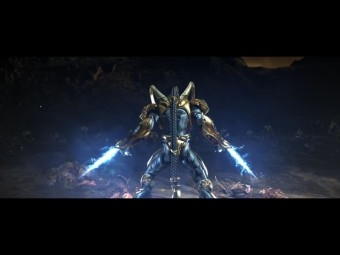

In [10]:
db = pymysql.connect(host = 'localhost', port = 3306 , user='root' ,
                     passwd='12345' , db='mysql' , charset ='utf8')
cursor = db.cursor()
sql = """SELECT * FROM images where image_nm = %s"""
cursor.execute(sql, ("20"))
result = cursor.fetchall()
db.close()

result

In [19]:
type(result)

str

In [17]:
byte = result[0][1]

In [18]:
result = byte.decode('utf-8')

In [ ]:
0. spring에서 플라스크 작동
0 -1 이미지 업로드 페이지까지
1.sql로 db에 저장(예측전 사진)
2. 예측
3. db에 저장(예측후 사진)

--> jpg로 바로 예측

# flask에서 모델

In [ ]:
import os
import torch

In [31]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, custom

def selectImg() : 
    path = "C:/Users/smhrd/Desktop/1차 프로젝트 관련/받아라/view"
    # path = "C:/Users/smhrd/Desktop/이미지"
    file_list = os.listdir(path)

    print("file_list : ", file_list)

    # Images
    for i in range(len(file_list)) :
        img = path + "/" + file_list[i]
        results = model(img)
        results.show()
        results.save(save_dir = 'C:/Users/smhrd/Desktop/1차 프로젝트 관련/받아라/result')
    return "a"

Using cache found in C:\Users\smhrd/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-9 torch 1.9.0+cu111 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)

Fusing layers... 
Model summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


In [32]:
from flask import Flask
from flask import request, redirect

app = Flask(__name__)

@app.route('/')
def first() :
    string = selectImg()
    return string

if __name__ == '__main__':
    app.run(host='127.0.0.1', port='9000')

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:9000/ (Press CTRL+C to quit)


file_list :  ['0.jpg', '1.jpg', '10.jpg', '11.jpg', '13.jpg', '16.jpg', '17.jpg', '2.jpg', '20.jpg', '21.jpg', '23.jpg', '24.jpg', '3.jpg', '5.jpg', '7.jpg', '8.jpg']


Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
Saved 1 image to C:\Users\smhrd\Desktop\1차 프로젝트 관련\받아라\result
127.0.0.

# 업로드하는 index 페이지 구동시키기 ( 생략 )

In [ ]:
#플라스크 서버 작동!
flask run
python3 app.py --port 5000 #->>>>index페이지 켜짐